In [128]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [129]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [130]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [131]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [132]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables

# Get the table names from the database
table_names = engine.table_names()

# View all of the classes that automap found
table_names

/var/folders/ds/jk39g9xd62v_5kxdlxcxn0800000gn/T/ipykernel_1052/208663800.py:8: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  table_names = engine.table_names()


['measurement', 'station']

In [133]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station

# # Dynamically create classes for each table using automap_base
# for table_name in table_names:
#     table_class = Base.classes.get(table_name)
#     setattr(Base.classes, table_name, table_class)
#     print(table_name)

In [134]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [135]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()

most_recent_date


'2017-08-23'

#### Design a query to retrieve the last 12 months of precipitation data and plot the results,</br> starting from the most recent data point in the database. 

In [141]:
one_year_previous

datetime.datetime

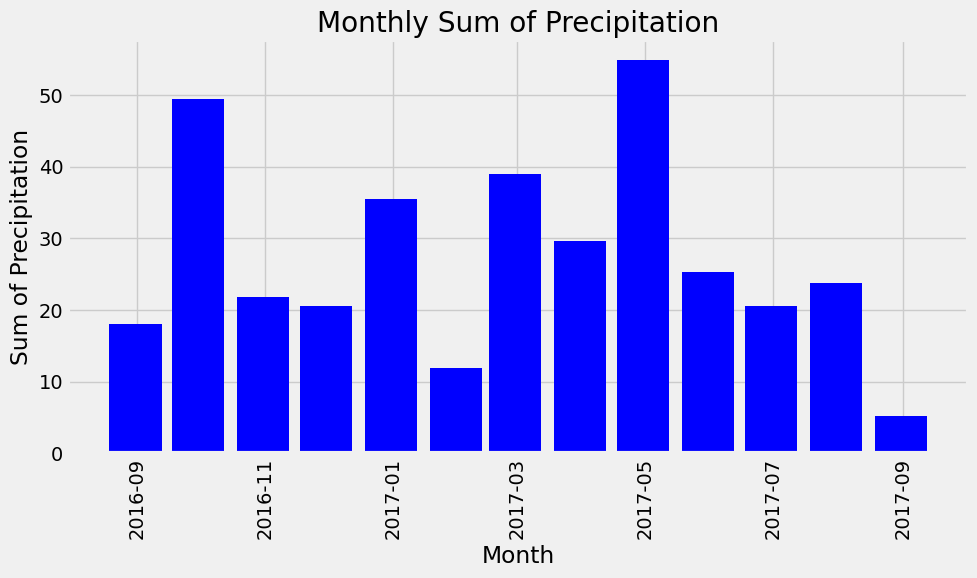

In [144]:
from datetime import datetime, timedelta


# Calculate the date one year previous
from_date = datetime.strptime(most_recent_date, "%Y-%m-%d")
one_year_previous = from_date - timedelta(days=365)

# Query for records within the specified date range
records_within_range = session.query(Measurement).filter(
    Measurement.date >= one_year_previous,
    Measurement.date <= from_date
).all()

# Extract column names and data from the query results 
column_names = [column.key for column in Measurement.__table__.columns]  
data = [measurement.__dict__ for measurement in records_within_range]  

# Create a DataFrame
year_prcp_df = pd.DataFrame(data, columns=column_names)

# Convert 'date' column to datetime format
year_prcp_df['date'] = pd.to_datetime(year_prcp_df['date'])

# Group the data by month and calculate the sum of precipitation for each month
monthly_sum_df = year_prcp_df.set_index('date').resample('M').sum()

# Reset the index for plotting
monthly_sum_df.reset_index(inplace=True)

# Set up the plot
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the bar chart
plt.bar(monthly_sum_df['date'], monthly_sum_df['prcp'], width=25, color='blue', align='center')

# Configure the plot
plt.xlabel('Month')
plt.ylabel('Sum of Precipitation')
plt.title('Monthly Sum of Precipitation')
plt.xticks(rotation=90)  

# Show the plot
plt.tight_layout()  
plt.show()

In [137]:
# Use Pandas to calculate the summary statistics for the precipitation data

prcp_summary = year_prcp_df['prcp'].describe()

print(prcp_summary)




count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64


In [138]:
session.close

<bound method Session.close of <sqlalchemy.orm.session.Session object at 0x17cfe0310>>